Este projeto de ciência de dados explora o cenário do turismo internacional no Brasil, utilizando dados históricos disponíveis no portal de dados abertos do governo federal ('https://dados.gov.br/dados/conjuntos-dados/estimativas-de-chegadas-de-turistas-internacionais-ao-brasil')  sobre a chegada de turistas para identificar padrões e tendências. Compreender de onde vêm os turistas, como chegam e para onde vão é crucial para a formulação de políticas públicas e estratégias de marketing no setor.

## Análise histórica do turismo no Brasil de 2000 a 2024

### - O objetivo do projeto é identificar de onde são os principais turistas do Brasil, qual a via de acesso mais utilizada por esses turistas, quais são as unidades federativas que mais recebem turistas e qual o mês que mais recebe turistas

1. Importar as bibliotecas que serão utilizadas

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

2. Ler os arquivos com os dados de fluxo de turistas no brasil

- Utilizei listas e uma variável com parte do caminho dos arquivos para 'automatizar' a leitura dos 24 arquivos
- Alterei as colunas 'Ano' que estavam escritas em maiúsculo para 'ano' para ficar padrão em todos os arquivos
- Alterei as colunas 'Via' para 'Via de acesso' para ficar todas no mesmo padrão
- Alterei as colunas 'Ordem continente' para 'cod continente' para ficar todas no mesmo padrão
- Alterei as colunas 'Ordem país' para 'cod pais' para ficar todas no mesmo padrão
- Alterei as colunas 'Ordem UF' para 'cod uf' para ficar todas no mesmo padrão
- Alterei as colunas 'Ordem via de acesso' para 'cod via' para ficar todas no mesmo padrão
- Alterei as colunas 'Ordem mês' para 'cod mes' para ficar todas no mesmo padrão

In [2]:
# Cria uma lista com os anos de todas as bases de dados
base_dados_anos = list(range(2000, 2025))
# Criando uma variavel para acessar o caminho onde estao as bases de dados
caminho = './bases_dados/'
# Criando uma lista para armaenar todas as bases de dados
data_frames = []
# Faz um loop para ler cada base de dados
for ano in base_dados_anos:
    arquivo = os.path.join(caminho, f'chegadas_{ano}.csv')
    df = pd.read_csv(arquivo, sep=';', encoding='ISO-8859-1')
    # Renomeia 'Ano' para 'ano', pois a partir de 2015 a coluna está como 'ano'
    df.rename(columns={'Ano': 'ano'}, inplace=True)
    df.rename(columns={'Via': 'Via de acesso'}, inplace=True)
    df.rename(columns={'Ordem continente': 'cod continente'}, inplace=True)
    df.rename(columns={'Ordem país': 'cod pais'}, inplace=True)
    df.rename(columns={'Ordem UF': 'cod uf'}, inplace=True)
    df.rename(columns={'Ordem via de acesso': 'cod via'}, inplace=True)
    df.rename(columns={'Ordem mês': 'cod mes'}, inplace=True)
    data_frames.append(df)

3. Criando uma base de dados única com todos os arquivos dos anos 2000 até 2024

In [27]:
base_dados_concatenada = pd.concat(data_frames, ignore_index=True)

4. Análise exploratória dos dados

In [ ]:
# Verificar nome das colunas, quantidade de dados nao nulos, e tipo de dado
base_dados_concatenada.info()

INFORMAÇÕES INICIAIS DA BASE DE DADOS:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762572 entries, 0 to 762571
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Continente      762572 non-null  object 
 1   cod continente  762572 non-null  int64  
 2   País            762572 non-null  object 
 3   cod pais        762572 non-null  int64  
 4   UF              762572 non-null  object 
 5   cod uf          762572 non-null  int64  
 6   Via de acesso   762572 non-null  object 
 7   cod via         762572 non-null  int64  
 8   ano             762572 non-null  int64  
 9   Mês             762572 non-null  object 
 10  cod mes         762572 non-null  int64  
 11  Chegadas        755660 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 69.8+ MB


- Tratamento de valores nulos

In [22]:
# Substituir valores nulos da coluna 'Chegadas' por 0
base_dados_concatenada['Chegadas'] = base_dados_concatenada['Chegadas'].fillna(0)

- Tratando inconsistência de dados na coluna 'Via de acesso'

In [ ]:
# Renomeando a via de acesso para 'Aérea' e 'Marítimo' na coluna 'Via de acesso' onde está como 'Aéreo' e 'Marítima'
base_dados_concatenada['Via de acesso'] = base_dados_concatenada['Via de acesso'].replace({'Aéreo': 'Aérea', 'Marítima':'Marítimo'})
# Garante que todos os meses estejam escritos em minúsculo
base_dados_concatenada['Mês'] = base_dados_concatenada['Mês'].str.lower()

- Verificar se todas as colunas estão com a mesma quantidade de dados

In [23]:
# Verificar se ainda ha colunas com dados ausentes
base_dados_concatenada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762572 entries, 0 to 762571
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Continente      762572 non-null  object 
 1   cod continente  762572 non-null  int64  
 2   País            762572 non-null  object 
 3   cod pais        762572 non-null  int64  
 4   UF              762572 non-null  object 
 5   cod uf          762572 non-null  int64  
 6   Via de acesso   762572 non-null  object 
 7   cod via         762572 non-null  int64  
 8   ano             762572 non-null  int64  
 9   Mês             762572 non-null  object 
 10  cod mes         762572 non-null  int64  
 11  Chegadas        762572 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 69.8+ MB


- Verificar algumas informações estatísticas da base de dados com a função .describe()

In [6]:
# Verificar media, mediana, menor valor, maior valor, desvio padrao...
print('INFORMAÇÕES ESTATÍSTICAS DA BASE DE DADOS')
base_dados_concatenada.describe()

INFORMAÇÕES ESTATÍSTICAS DA BASE DE DADOS


,cod continente,cod pais,cod uf,cod via,ano,cod mes,Chegadas
count,762572.000000,762572.000000,762572.000000,762572.000000,762572.000000,762572.000000,755660.000000
mean,4.493904,176.272141,22.612843,2.107131,2014.379190,6.541091,169.634419
std,1.816888,249.833043,25.218193,1.088387,6.764732,3.468081,1905.615632
min,1.000000,1.000000,1.000000,1.000000,2000.000000,1.000000,0.000000
25%,4.000000,53.000000,7.000000,1.000000,2009.000000,4.000000,0.000000
50%,5.000000,94.000000,17.000000,2.000000,2016.000000,7.000000,0.000000
75%,6.000000,180.000000,23.000000,3.000000,2020.000000,10.000000,5.000000
max,8.000000,999.000000,99.000000,4.000000,2024.000000,12.000000,386823.000000


- Grafico com tendência anual de chegada de turistas

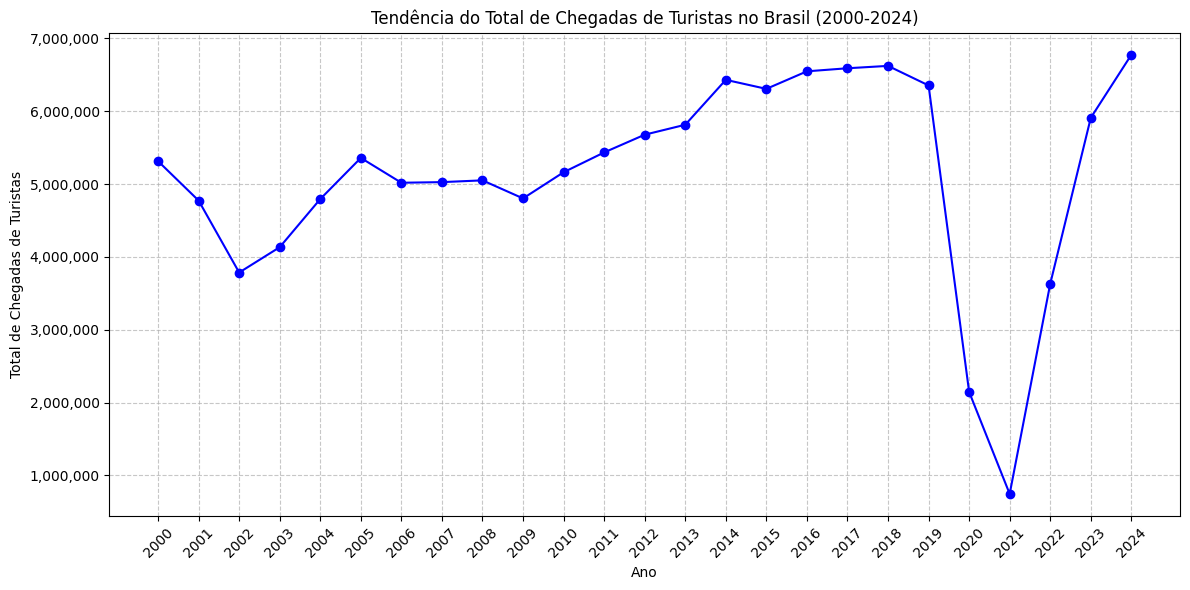

In [24]:
# Agrupar total de chegadas por ano
chegadas_por_ano = base_dados_concatenada.groupby('ano')['Chegadas'].sum().reset_index()
# Criar gráfico de linha para a tendencia anual
plt.figure(figsize=(12, 6))
plt.plot(chegadas_por_ano['ano'], chegadas_por_ano['Chegadas'], marker='o', linestyle='-', color='blue')
plt.title('Tendência do Total de Chegadas de Turistas no Brasil (2000-2024)')
plt.xlabel('Ano')
plt.ylabel('Total de Chegadas de Turistas')
plt.grid(True, linestyle='--', alpha=0.7)
# Garante que todos os anos sejam mostrados no eixo x
plt.xticks(chegadas_por_ano['ano'], rotation=45) 
# Formata o eixo y desativando a notacao cientifica e demonstrando os dados em milhar
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}')) 
plt.tight_layout()
plt.show()

- Gráfico com top 10 Países que mais enviaram Turistas ao Brasil

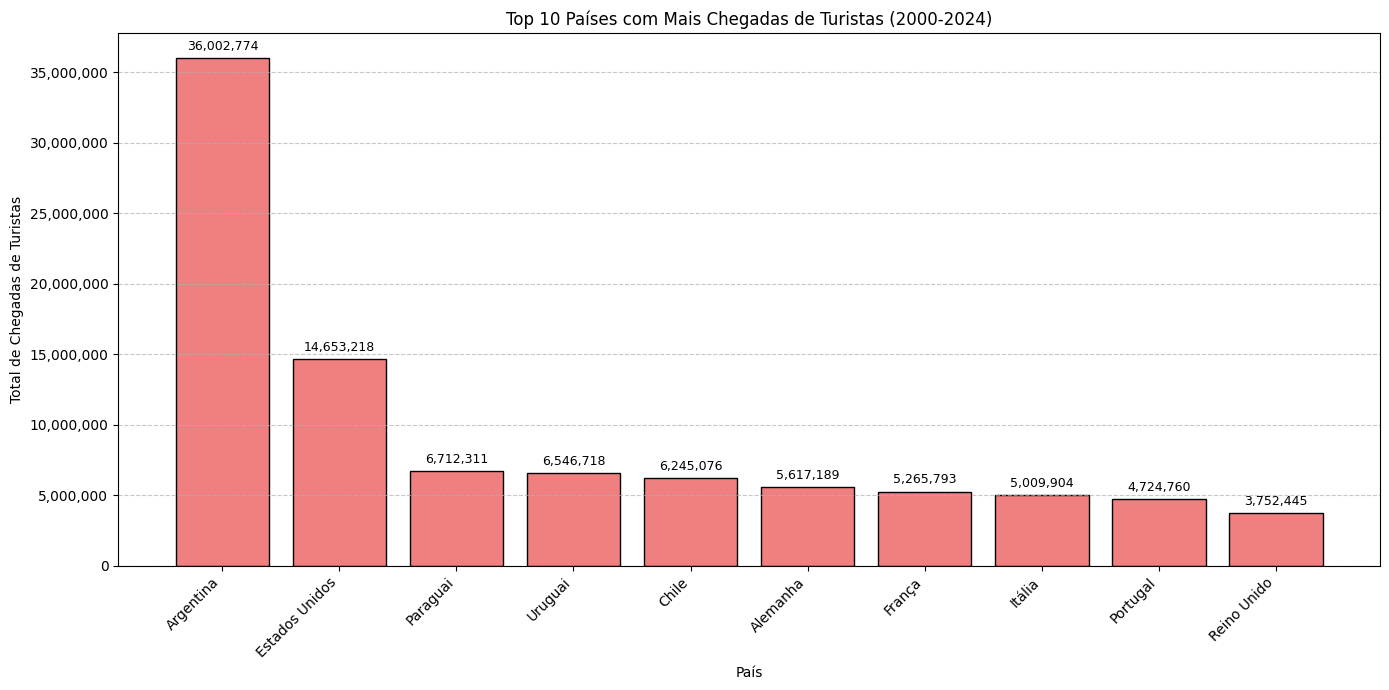

In [10]:
# Agregação e seleção dos top 10 países
chegadas_por_pais = base_dados_concatenada.groupby('País')['Chegadas'].sum().nlargest(10).reset_index()

# Criar gráfico de barras para os top 10 países
plt.figure(figsize=(14, 7))
bar_plot = plt.bar(chegadas_por_pais['País'], chegadas_por_pais['Chegadas'], color='lightcoral', edgecolor='black')
plt.title('Top 10 Países com Mais Chegadas de Turistas (2000-2024)')
plt.xlabel('País')
plt.ylabel('Total de Chegadas de Turistas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=45, ha='right')
for bar in bar_plot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (max(chegadas_por_pais['Chegadas'])*0.01), f'{int(yval):,}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

- Gráfico com top 5 Continentes que mais enviaram Turistas ao Brasil

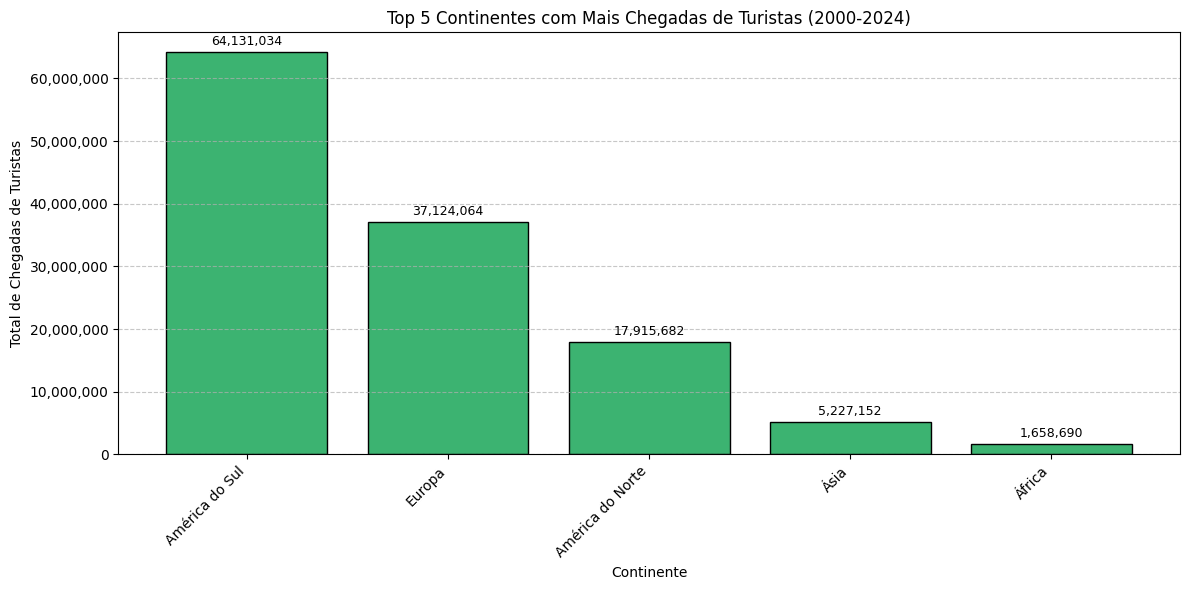

In [11]:
# Agregação e seleção dos top continentes
chegadas_por_continente = base_dados_concatenada.groupby('Continente')['Chegadas'].sum().nlargest(5).reset_index()

# Criar gráfico de barras para os top continentes
plt.figure(figsize=(12, 6))
bar_plot_cont = plt.bar(chegadas_por_continente['Continente'], chegadas_por_continente['Chegadas'], color='mediumseagreen', edgecolor='black')
plt.title('Top 5 Continentes com Mais Chegadas de Turistas (2000-2024)')
plt.xlabel('Continente')
plt.ylabel('Total de Chegadas de Turistas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}')) # Formata o eixo y
plt.xticks(rotation=45, ha='right')
for bar in bar_plot_cont:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (max(chegadas_por_continente['Chegadas'])*0.01), f'{int(yval):,}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

- Gráfico com as Vias de Acesso mais utilizadas pelos Turistas 

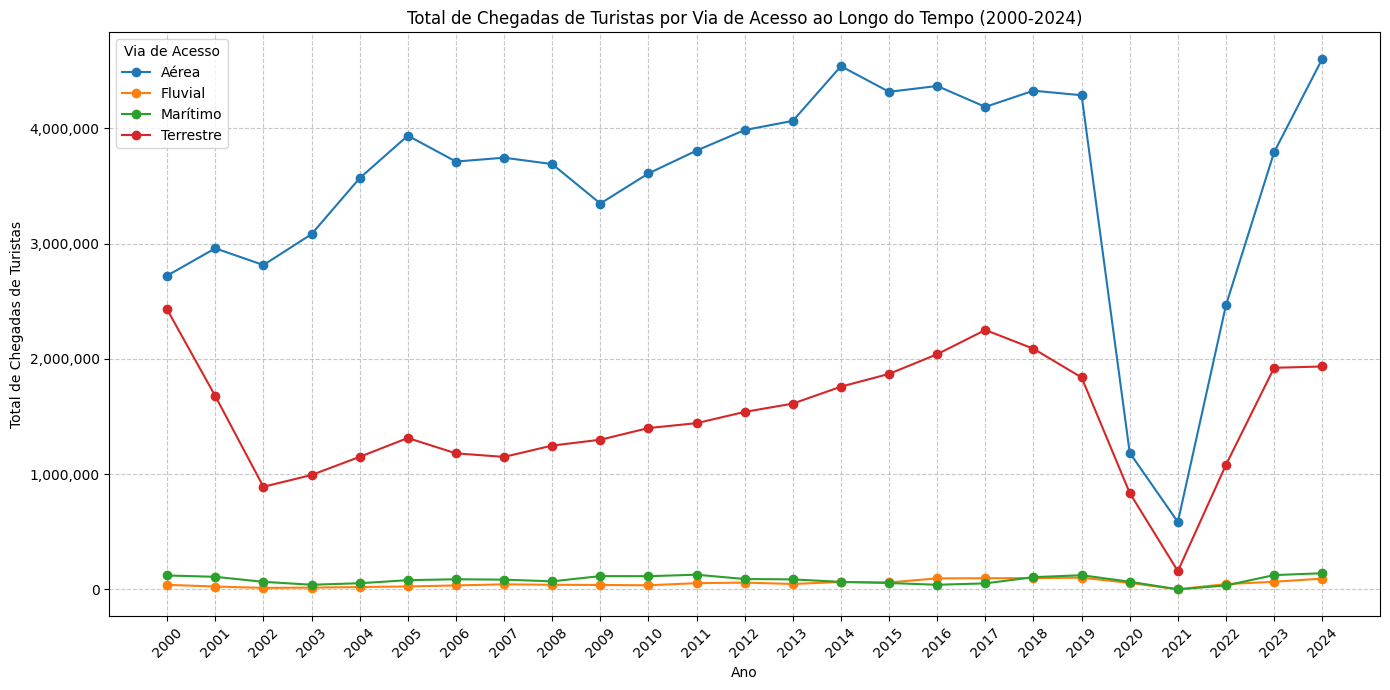

In [12]:
# Agregação de chegadas por Via de Acesso ao longo do tempo
chegadas_por_via_ano = base_dados_concatenada.groupby(['ano', 'Via de acesso'])['Chegadas'].sum().unstack().reset_index()

# Criar gráfico de linhas múltiplas para chegadas por Via de Acesso
plt.figure(figsize=(14, 7))
for column in chegadas_por_via_ano.columns[1:]:
    plt.plot(chegadas_por_via_ano['ano'], chegadas_por_via_ano[column], marker='o', label=column)

plt.title('Total de Chegadas de Turistas por Via de Acesso ao Longo do Tempo (2000-2024)')
plt.xlabel('Ano')
plt.ylabel('Total de Chegadas de Turistas')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(chegadas_por_via_ano['ano'], rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}')) # Formata o eixo y
plt.legend(title='Via de Acesso')
plt.tight_layout()
plt.show()

- Gráfico com top 10 Unidades Federativas mais usadas pelos Turistas

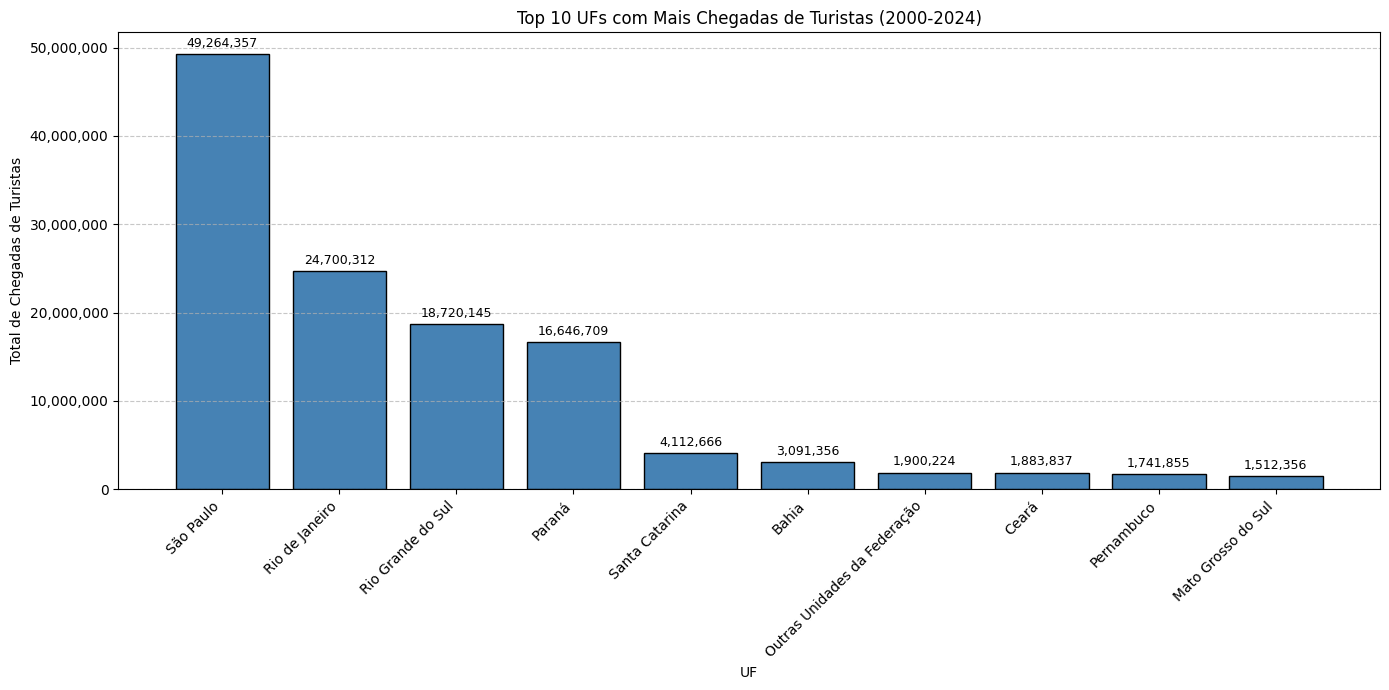

In [13]:
# 2. Agregação e seleção dos top 10 UFs
chegadas_por_uf = base_dados_concatenada.groupby('UF')['Chegadas'].sum().nlargest(10).reset_index()

# Criar gráfico de barras para os top 10 UFs
plt.figure(figsize=(14, 7))
bar_plot_uf = plt.bar(chegadas_por_uf['UF'], chegadas_por_uf['Chegadas'], color='steelblue', edgecolor='black')
plt.title('Top 10 UFs com Mais Chegadas de Turistas (2000-2024)')
plt.xlabel('UF')
plt.ylabel('Total de Chegadas de Turistas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}')) # Formata o eixo y
plt.xticks(rotation=45, ha='right')
for bar in bar_plot_uf:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (max(chegadas_por_uf['Chegadas'])*0.01), f'{int(yval):,}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

5. Identificar informações referentes ao mês que mais recebeu chegadas em cada ano

In [14]:
# Lista com os anos presentes na base de dados
historico_anos = list(range(2000, 2025))
# dicionario para armazenar as informacoes
mes_mais_visitas_por_ano = {}
# Loop para percorrer por cada ano
for ano in historico_anos:
    # Filtra a base de dados concatenada por um ano especifico
    filtro_ano = base_dados_concatenada[base_dados_concatenada['ano'] == ano]
    # Filtra a base de dados do ano pela coluna 'Chegadas' a partir do maior valor encontrado na coluna 'Chegadas'
    filtro_mes_mais_chegadas = filtro_ano[filtro_ano['Chegadas'] == filtro_ano['Chegadas'].max()]
    # Encontra o mes que recebeu mais chegadas no ano analisado
    mes_mais_chegadas = filtro_mes_mais_chegadas['Mês'].unique()
    # Encontra qual o continente que mais visitou o Brasil
    continente = filtro_mes_mais_chegadas['Continente'].unique()
    # Encontra qual o pais que mais visitou o Brasil
    pais = filtro_mes_mais_chegadas['País'].unique()
    # Encontra qual  a uf que mais recebeu essas visitas
    uf = filtro_mes_mais_chegadas['UF'].unique()
    # Encontra qual o meio de transporte mais usado nas visitas ao Brasil
    via_acesso = filtro_mes_mais_chegadas['Via de acesso'].unique()

    chegadas = filtro_mes_mais_chegadas['Chegadas'].unique()
    # Insere o ano como chave e multiplas informações como um novo dicionario
    mes_mais_visitas_por_ano[ano] = {
            'Mês': mes_mais_chegadas[0],
            'Continente': continente[0],
            'País': pais[0],
            'UF': uf[0],
            'Via de Acesso': via_acesso[0],
            'Chegadas': chegadas[0]
        }

print(mes_mais_visitas_por_ano)

# Transforma o dicionário em DataFrame
df_dados_mais_chegadas = pd.DataFrame.from_dict(mes_mais_visitas_por_ano, orient='index')
df_dados_mais_chegadas.reset_index(inplace=True)
df_dados_mais_chegadas.rename(columns={'index': 'Ano'}, inplace=True)

{2000: {'Mês': 'janeiro', 'Continente': 'América do Sul', 'País': 'Argentina', 'UF': 'Rio Grande do Sul', 'Via de Acesso': 'Terrestre', 'Chegadas': np.float64(120339.0)}, 2001: {'Mês': 'janeiro', 'Continente': 'América do Sul', 'País': 'Argentina', 'UF': 'Rio Grande do Sul', 'Via de Acesso': 'Terrestre', 'Chegadas': np.float64(78239.0)}, 2002: {'Mês': 'janeiro', 'Continente': 'América do Sul', 'País': 'Argentina', 'UF': 'Rio Grande do Sul', 'Via de Acesso': 'Terrestre', 'Chegadas': np.float64(62752.0)}, 2003: {'Mês': 'fevereiro', 'Continente': 'América do Norte', 'País': 'Estados Unidos', 'UF': 'São Paulo', 'Via de Acesso': 'Aérea', 'Chegadas': np.float64(55126.0)}, 2004: {'Mês': 'janeiro', 'Continente': 'América do Sul', 'País': 'Argentina', 'UF': 'Rio Grande do Sul', 'Via de Acesso': 'Terrestre', 'Chegadas': np.float64(88390.0)}, 2005: {'Mês': 'janeiro', 'Continente': 'América do Sul', 'País': 'Argentina', 'UF': 'Rio Grande do Sul', 'Via de Acesso': 'Terrestre', 'Chegadas': np.float6

6. Criação de gráficos referentes ao mês que mais chegou turistas em cada ano

- Informações auxiliares para criação do gráfico de meses

In [15]:
# Cria um dicionario com os meses e o numero que representa cada mes de 1 a 12
numero_dos_meses = {'janeiro': 1, 'fevereiro': 2, 'março': 3, 'abril': 4,
'maio': 5, 'junho': 6, 'julho': 7, 'agosto': 8, 'setembro': 9, 'outubro': 10, 'novembro': 11, 'dezembro': 12
}

# Lista para receber o numero dos meses
meses_numericos_para_grafico = []

# Pega os anos na planilha com informacoes referentes aos meses com mais chegadas de cada ano
anos = list(df_dados_mais_chegadas['Ano'])

# Pega os meses na planilha com informacoes referentes aos meses com mais chegadas de cada ano
meses = list(df_dados_mais_chegadas['Mês'])

# loop para verificar os meses e quais numeros devem ser pegos
for mes in meses:
    if mes in numero_dos_meses.keys():
        meses_numericos_para_grafico.append(numero_dos_meses[mes])

- Gráfico de barras com demonstração dos meses que mais chegaram turistas ao Brasil no período de 2000 a 2024

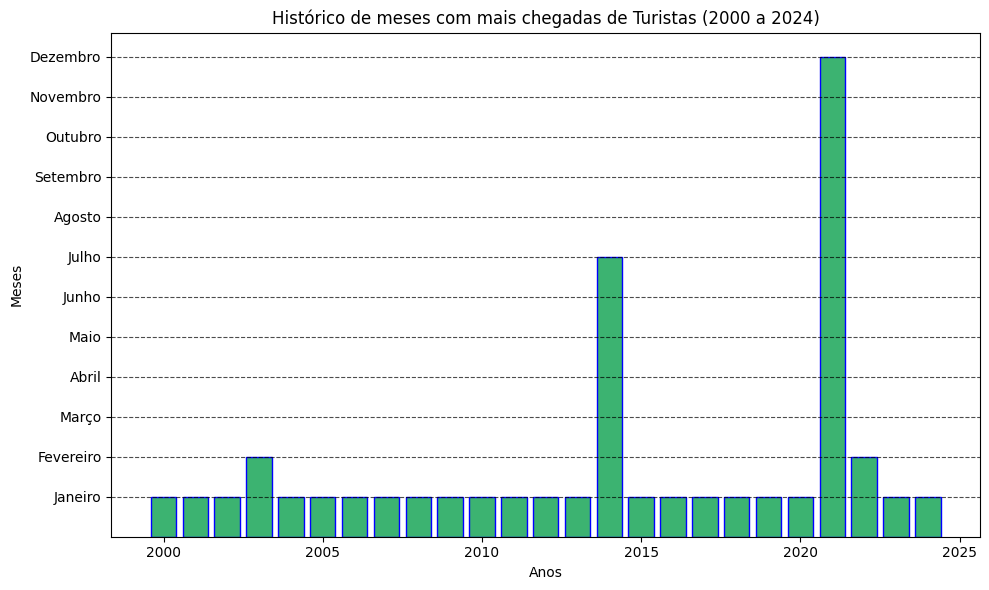

In [16]:
# Define o tamanho da imagem que aparecera o grafico
plt.figure(figsize=(10,6))
# Cria as barras
plt.bar(anos, meses_numericos_para_grafico, color='mediumseagreen', edgecolor='blue')
# Titulo do grafico
plt.title("Histórico de meses com mais chegadas de Turistas (2000 a 2024)")
# Titulo do eixo x
plt.xlabel("Anos")
# Titulo do eixo y
plt.ylabel("Meses")
# Insere linhas pontilhadas no eixo y
plt.grid(axis='y', linestyle='--', alpha=0.7, color='black')

# Cria um novo dicionario invertendo o numero como chave e o valor como o nome do mes, .capitalize() deixa a primeira letra da string com nome do mes em maiuscula
meses_por_numero = {v: k.capitalize() for k, v in numero_dos_meses.items()}
# Ordena em ordem crescente as chaves do dicionario
y_rotulo = sorted(list(meses_por_numero.keys()))
# Seleciona os meses conforme a lista ordenada 
y_labels = [meses_por_numero[rotulo] for rotulo in y_rotulo]
# Personaliza os valores do eixo y, para apresentar os meses em ordem
plt.yticks(y_rotulo, y_labels)
# ajusta automaticamente os elementos do grafico
plt.tight_layout()
# exibe o grafico
plt.show()

## Conclusão

1. Através das análises foi possível concluir que o continente que mais envia turistas ao Brasil é a América do Sul, seguido do continente Europeu. Quanto aos páises que mais enviam turistas ao Brasil a Argentina lidera o ranking seguida dos Estados Unidos. 
O fato da América do Sul e da Argentina se destacarem como líderes de turistas no Brasil pode ser explicado pela proximidade geofráfica com o Brasil, além da questão financeira onde as moedas de outros países da América do Sul possuem uma valorização próximas a do Brasil como no caso da Argentina, tornando mais viável pessoas desses países visitarem o Brasil.

2. Em relação as vias de acesso mais utilizadas se destacam as vias aéreas e terrestres como as preferidas dos turistas para visitarem o Brasil.
Esses meios de acesso ao Brasil se destacam por questões de proximidade geográfica e a facilidade de deslocamento.
3. As 3 unidades federativas que mais recebem turistas no Brasil são:

   1 - São Paulo

   2 - Rio de Janeiro

   3 - Rio Grande do Sul

    Essas 3 cidades se destacam devido  a ampla diversidade cultural, belezas naturais e suas gastronomias, além de investimentos em tecnologia, eventos e transportes que melhoram a experiência turistica.

4. Janeiro demonstrou ser o mês preferido dos turistas para visitar o Brasil, seguido de fevereiro, julho e dezembro.
Esses meses se destacam pois costumam ser meses de férias escolares, onde a atividade turistica aumenta em todo o mundo.
